# Python Assignment #4: Multiple Hypothesis Testing

1) Repeat steps (1)-(3) for PA#2, except this time learn the mean and likelihood function for all ten classes '0' to '9'. Display a sample image from each class.

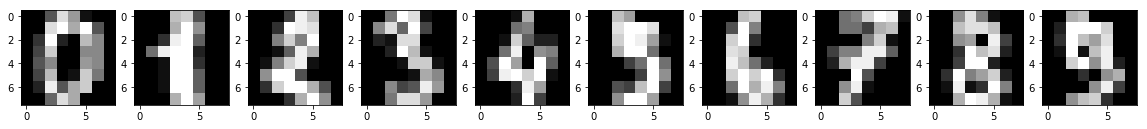

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
images = digits.images
targets = digits.target

mu = np.zeros([10,8,8])

fig, axs = plt.subplots(ncols=10, figsize=(20, 20))
for i in range(0,10):
    indices = targets == i
    these_images = images[indices]
    mu[i,:,:] =  np.mean(these_images,0)
    axs[i].imshow(these_images[0,:,:],cmap=plt.cm.gray,interpolation="nearest")
plt.show()

2) For sigma^2 = 1000, derive the *maximum-likelihood* detector. Drawing 1000 samples randomly and uniformly from the classes, compute empirically the probability of error. You may find it convenient to use a for loop over all the classes to implement the ML detector.

In [33]:
sigma_2 = 1000
NUM_SAMPLES = 1000

P_e = 0
for k in range(0,NUM_SAMPLES):
    H = np.random.randint(0,10)
    y = mu[H,:,:] + np.sqrt(sigma_2)*np.random.randn(8,8)
    y = y.flatten()
    norms = np.zeros(10)
    for i in range(0,10):
        norms[i] = np.dot(y-mu[i,:,:].flatten(),y-mu[i,:,:].flatten())
    H_hat = np.argmin(norms)
    if(H != H_hat):
        P_e += 1/NUM_SAMPLES
print(P_e)


0.7410000000000005


3) Next, you will compute the *confusion matrix* of the detector. The confusion matrix tells how often class i is confused for class j in a detector. In this case, you will build a 10x10 matrix where the (i,j)th element displays the fraction of the times that an image that comes from class i is "confused" as an image from class j. Each matrix entry should be between zero and one. For sigma^2 = 1000, draw 10,000 samples randomly and uniformly from the classes and compute the confusion matrix. What do you see? Are some classes more easily confused than others? Why?

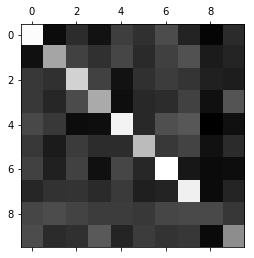

In [40]:
sigma_2 = 1000
NUM_SAMPLES = 10000

C = np.zeros([10,10])
for k in range(0,NUM_SAMPLES):
    H = np.random.randint(0,10)
    y = mu[H,:,:] + np.sqrt(sigma_2)*np.random.randn(8,8)
    y = y.flatten()
    norms = np.zeros(10)
    for i in range(0,10):
        norms[i] = np.dot(y-mu[i,:,:].flatten(),y-mu[i,:,:].flatten())
    H_hat = np.argmin(norms)
    C[H,H_hat] += 1/NUM_SAMPLES

plt.matshow(C)
plt.gray()
plt.show()

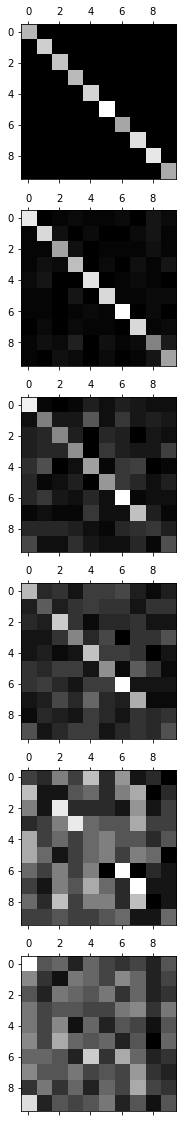

In [46]:
sigma_2s = [10, 100, 500, 1000, 5000, 10000]
NUM_SAMPLES = 500
fig, axs = plt.subplots(nrows=len(sigma_2s), figsize=(20, 20))

for j in range(0,len(sigma_2s)):
    sigma_2 = sigma_2s[j]
    C = np.zeros([10,10])
    for k in range(0,NUM_SAMPLES):
        H = np.random.randint(0,10)
        y = mu[H,:,:] + np.sqrt(sigma_2)*np.random.randn(8,8)
        y = y.flatten()
        norms = np.zeros(10)
        for i in range(0,10):
            norms[i] = np.dot(y-mu[i,:,:].flatten(),y-mu[i,:,:].flatten())
        H_hat = np.argmin(norms)
        C[H,H_hat] += 1/NUM_SAMPLES
    axs[j].matshow(C)

plt.show()